In [1]:
import numpy as np

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X = data.data
y = data.target

from sklearn import linear_model
clf = linear_model.LogisticRegression()


from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]


In [2]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, 
                         X_train, y_train, 
                         cv=10) # StratifiedKFold

In [3]:
scores.mean()

0.94734299516908216

In [4]:
C_range_exp = np.linspace(start=-15, stop=20, num=36)
C_range = 10 ** C_range_exp
print(C_range)

[  1.00000000e-15   1.00000000e-14   1.00000000e-13   1.00000000e-12
   1.00000000e-11   1.00000000e-10   1.00000000e-09   1.00000000e-08
   1.00000000e-07   1.00000000e-06   1.00000000e-05   1.00000000e-04
   1.00000000e-03   1.00000000e-02   1.00000000e-01   1.00000000e+00
   1.00000000e+01   1.00000000e+02   1.00000000e+03   1.00000000e+04
   1.00000000e+05   1.00000000e+06   1.00000000e+07   1.00000000e+08
   1.00000000e+09   1.00000000e+10   1.00000000e+11   1.00000000e+12
   1.00000000e+13   1.00000000e+14   1.00000000e+15   1.00000000e+16
   1.00000000e+17   1.00000000e+18   1.00000000e+19   1.00000000e+20]


In [5]:
all_scores_mean = []
all_scores_std  = []

for C in C_range:
    clf.C = C
    scores = cross_val_score(clf, 
                             X_train, y_train,
                             cv=10) # StratifiedKFold
    
    all_scores_mean.append(scores.mean())
    all_scores_std.append(scores.std())

In [6]:
all_scores_mean = np.array(all_scores_mean)
all_scores_std  = np.array(all_scores_std)

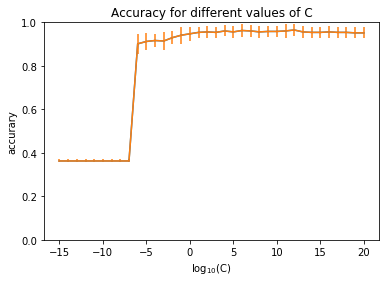

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(C_range_exp, all_scores_mean)

plt.errorbar(C_range_exp, 
             all_scores_mean, 
             yerr=all_scores_std)

plt.ylim(0,1)
plt.ylabel('accurary')
plt.xlabel('$\log_{10}$(C)')
plt.title('Accuracy for different values of C')

In [8]:
all_scores_mean.max()

0.9649275362318841

In [9]:
max_index = np.argmax(all_scores_mean)

In [10]:
C_range_exp[max_index]

12.0

In [11]:
clf.C = 10 ** C_range_exp[max_index]

In [12]:
clf.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [13]:
clf.score(X_test, y_test)

0.95614035087719296

In [14]:
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.95614035087719296